# Deep Dive into Deep Learning: Fine-tuning a Large Language Model for Housing Price Prediction

**Welcome to the world of Large Language Models!**

In this project, you'll get a hands-on in building a state-of-the-art AI system capable of predicting housing prices. This challenge will immerse you in the core concepts of modern Natural Language Processing (NLP).

## Prerequisites: A Foundation for Exploration

This project assumes a basic familiarity with Python programming and Machine Learning.  While prior experience with deep learning libraries is beneficial, it's not strictly required, as we'll guide you through the essential concepts and techniques.

**Here's a breakdown of the key prerequisites and resources to help you get started:**

### 1. Machine Learning and Deep Learning:  The Power of Pattern Recognition

*   **Machine Learning: From the Data Up**
  
  Machine learning algorithms grow models that realize rules and patterns from data without explicit programming. That is, instead of implementing rules based on human knowledge, we feed these algorithms large datasets, allowing them to identify trends on their own, with little expert's involvement. The aim of doing Machine Learning is to make predictions that are consistent with past and future observations.
*   **Deep Learning: A Revolution in Artificial Intelligence**

  Deep learning represents a powerful subset of machine learning that utilizes artificial neural networks – with computational structures inspired by the human brain – to model intricate patterns and relationships within data.  Deep learning has driven remarkable breakthroughs in computer vision, natural language processing, and countless other domains.
    *   **Further Reading:** [Deep Learning](https://www.deeplearningbook.org/) by Ian Goodfellow, Yoshua Bengio, and Aaron Courville provides a comprehensive introduction to the field.

### 2. The Natural Language Modeling Task: Teaching Machines to Understand Human Language

*   **Decoding the Essence of Language**

  Natural language processing (NLP) focuses on bridging the gap between human language and computer understanding. It encompasses a wide range of tasks, from simple text classification to machine translation and question answering.
*   **The Power of Deep Learning in NLP**

  Deep learning models, particularly those based on the Transformer architecture (more on that below!), have revolutionized NLP. Their ability to capture long-range semantic dependencies and intricate syntactic structures has led to significant improvements in language understanding and generation.
    *   **Further Reading:**  The Stanford CS224N course ([Website](http://web.stanford.edu/class/cs224n/)) offers slides and notes that serve as a fantastic deep dive into NLP with deep learning.

### 3. Transformers: The Architecture Reshaping NLP

*   **Beyond Recurrent Networks**

  Traditional recurrent neural networks (RNNs) faced challenges in processing long sequences of text due to their sequential nature. Transformers, introduced in the groundbreaking paper "Attention Is All You Need" ([Paper](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)), addressed these limitations by leveraging an innovative self-attention mechanism.
*   **Attention is All You Need**  

  Self-attention allows the model to weigh the importance of different words in a sentence when processing information, enabling it to capture relationships and dependencies across long distances efficiently. This breakthrough architecture has become the workhorse of modern NLP solutions.

  We will be working with the T5 model in this project. It is a generic encoder-decoder Transformer model commonly used by researchers and academics to study the extend of machine language modeling.

### 4. Hugging Face, PyTorch, and the Power of Open-Source AI

*   **Hugging Face Transformers: Your Gateway to NLP**

  Hugging Face provides a powerful and user-friendly library ([Hugging Face Documentation](https://huggingface.co/docs/transformers/index)) that simplifies the use of pre-trained Transformer models for various NLP tasks.  You'll use it extensively throughout this project.
*   **PyTorch: A Powerful Auto-Diff Framework**

  PyTorch is a widely adopted deep learning framework known for its dynamic computation graph and intuitive API. Its auto-differentiation capabilities streamline the process of calculating gradients, a critical aspect of training large neural networks with complex computation structures.
    *   **Further Reading:**  The official [PyTorch Tutorials](https://pytorch.org/tutorials/) are an excellent resource for getting started.

### 5. The Deep Learning Training Pipeline: A Step-by-Step Guide

1.  **Data Preparation:**  Transforming raw data into a format suitable for training a deep learning model, often involving cleaning missing or invalid data values, data normalization, and splitting into training, validation, and test sets.
2.  **Model Selection:** Choosing an appropriate model architecture (in our case, a pre-trained Transformer) based on the task/dataset characteristics. This is where the expert's intuition comes in, but at a very high level.
3.  **Loss Function and Optimizer:** Defining a loss function that continuously quantifies the model's errors during training and selecting an optimization algorithm (typically Stochastic Gradient Descent and variations) to adjust the model's parameters and minimize this loss function.
4.  **Training:** Feeding the training data through the model - in batches or all at once, calculating the loss, and using backpropagation to update the model's weights. We typically need to do these steps many times.
5.  **Validation:**  Evaluating the model's performance on a separate validation set to tune hyperparameters and prevent overfitting (where the model memorizes the training data so it fails to generalize to unseen examples).
6.  **Testing:** Assessing the model's final performance on a held-out test set to provide an unbiased estimate of its generalization correctness. These test examples should not have been used in tuning the model's parameters nor its hyperparameters.

### 6. Project Goals: Unveiling the Apparent Magic of Deep Learning

In this project, our aim is to provide you with practical experience and a deeper understanding of:

*   **Fine-tuning Pretrained Language Models:** You'll learn how to adapt a powerful pre-trained language model (T5) to a specific task, scientific question answering, by training it on a relevant dataset.
*   **Hyperparameter Tuning:** Experimenting with different training settings to optimize your model's performance.
*   **Evaluating Model Performance:** Using appropriate metrics to assess your model's effectiveness.
*   **Model Interpretability:** Gaining insights into how your model makes decisions, particularly by visualizing the attention mechanism within the Transformer architecture.

**To be successful at this project's learning goals, we expect that you read the description of each section, run every code block sequentially from top to bottom (you can check if your implementation is correct by compare and contrast with the provided outputs), and complete the TODOs and final report. In addition, we highly encourage you to break free from the provided starter code and implement additional features for data augmnetation, model interpretability and visualization, etc. Happy deep diving!**

In [12]:
!pip install transformers tqdm # Install necessary libraries (Run this cell first)

In [13]:
import os # For interacting with the operating system
import pandas as pd # For data storage, manipulation, and fast analysis
from transformers import T5Tokenizer, T5ForConditionalGeneration # For the T5 model
from torch.utils.data import Dataset, DataLoader # For making custom datasets
from tqdm import tqdm # For visualizing training/testing progress bar
import torch # PyTorch library for deep learning
import sklearn # For fast initialization of machine learning models and algorithms
import matplotlib.pyplot as plt # For plotting graphs
import seaborn as sns # For plotting heatmaps
import warnings # For printing warning messages

# Part 1: Data Preparation & Preprocessing
1. Load the Boston Housing Dataset

Download the [Boston Housing Dataset](https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset/input), upload it to your Colab environment, and use the correct path name to programmatically access that file (should be a csv file) during runtime. If you would like to learn what the column names mean or the dataset origin, please visit [this link](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) (it is highly recommended that you intimately understand the dataset you are working with).

Remember that our task is to train a model that can predict the price of houses given other attributes/features of those houses. That is, the last column of this data is what we aim to make the model correctly predict given the other columns.

In [14]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names) # Replace with the appropriate path if necessary

# Inspect the dataframe
print(data.head()) # Display the first few rows of the dataset
print()
print("Dataset dimensions:", data.shape) # Display the number of rows and columns in the dataset
print()
print(data.info()) # Display information about the dataset (data types, missing values of each column, etc.)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

Dataset dimensions: (506, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    

2. Define a function to transform the dataset

If you have been in Machine Learning for some time, you might have notice that price prediction is a regression task, which means the model should output continuous numerical values. However, T5 is a language model, which means it outputs discrete text tokens. We will handle this discrepancy in modality in the later section. For now, we need to convert the given numerical data format to the textual data format so our T5 model can consume this data.

We need to do the following data processing steps:
-  Combining Text: We combine the features into a single text string because the T5 model expects a single natural language string as input. The T5 model also outputs a single natural language string so we also need to make the ground-truth label a text string so we can supervise the model outputs versus the ground-truth labels.
- Pandas DataFrame: We convert this data into a [Pandas DataFrame](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) for efficient data manipulation and to easily feed the data into our training pipeline later.

In [15]:
def reformat_dataset(data: pd.DataFrame) -> pd.DataFrame:

    formatted_data = []

    for _, row in data.iterrows():
        # Combine all feature values except the last column (MEDV) into a descriptive input string
        input_string = (
            f"The property has crime rate {row['CRIM']}, zoning proportion {row['ZN']}, "
            f"non-retail business acres {row['INDUS']}, is near the Charles River ({int(row['CHAS'])}), "
            f"has nitric oxide concentration {row['NOX']}, average rooms {row['RM']}, "
            f"proportion of owner-occupied units {row['AGE']}, distance to employment centers {row['DIS']}, "
            f"accessibility index {row['RAD']}, tax rate {row['TAX']}, "
            f"pupil-teacher ratio {row['PTRATIO']}, and lower status percentage {row['LSTAT']}."
        )


        output_string = str(row['MEDV'])


        formatted_data.append((input_string, output_string))


    return pd.DataFrame(formatted_data, columns=["input", "output"])



formatted_data = reformat_dataset(data)
print(formatted_data.head())


                                               input output
0  The property has crime rate 0.00632, zoning pr...   24.0
1  The property has crime rate 0.02731, zoning pr...   21.6
2  The property has crime rate 0.02729, zoning pr...   34.7
3  The property has crime rate 0.03237, zoning pr...   33.4
4  The property has crime rate 0.06905, zoning pr...   36.2


3. Split the data into training, validation, and test sets

It's essential to divide our data into three separate sets: training, validation, and test. Let's understand why this is crucial:

- Training Data:  This is the largest portion of our data, used to directly train the model's parameters.
- Validation Data: Held separate from the training data, this set is used to fine-tune the model's hyperparameters (like learning rate, batch size, epochs) and get an early sense of its performance on unseen data.
- Test Data: The most important subset! It's kept hidden from the model during training and validation and used only at the very end to provide an unbiased evaluation of the final model's performance.

To efficiently feed our data to the T5 model during training, we'll create a custom dataset class and a data collate function. They handle the extraction and tokenization of our text data and organizes it into a format readily consumable by the PyTorch DataLoader.

**Key Benefits of Defining a Custom Dataset Class and a Data Collate Function**
- Organized Data Loading:  Simplifies the process of accessing and preparing data batches during training. Especially when the data may be coming in various format (e.g. dictionaries, lists, dataframes, etc.).
- On-the-Fly Tokenization:  Performs tokenization (more on this in the next section) and sequence length padding efficiently when a data sample is requested.
- Integration with DataLoader:  Works seamlessly with PyTorch's DataLoader for data multi-processing and data shuffling.

In [16]:
from sklearn.model_selection import train_test_split


train_data, temp_data = train_test_split(formatted_data, test_size=0.3, random_state=42)  # 70% train, 30% temp
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)  # Split remaining 30% into 15% each

print(f"Training data: {len(train_data)} samples")
print(f"Validation data: {len(val_data)} samples")
print(f"Test data: {len(test_data)} samples")

class OurDataset(Dataset):
    def __init__(self, data: pd.DataFrame):

        self.data = data

    def __len__(self):

        return len(self.data)

    def __getitem__(self, at_index: int) -> dict:
        """
        Args:
            at_index (int): Index of the sample to retrieve.

        Returns:
            dict: A dictionary with 'text' (input string) and 'label' (output string).
        """
        item_at_index = {
            "text": self.data.iloc[at_index]["input"],
            "label": self.data.iloc[at_index]["output"],
        }
        return item_at_index



train_dataset = OurDataset(train_data)
val_dataset = OurDataset(val_data)
test_dataset = OurDataset(test_data)


print(train_dataset[0])


from transformers import T5Tokenizer


tokenizer = T5Tokenizer.from_pretrained("t5-small")

def collate_fn(batch):

    texts = [item["text"] for item in batch]
    labels = [item["label"] for item in batch]

    # Tokenize inputs and labels, and convert to PyTorch tensors
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    outputs = tokenizer(labels, padding=True, truncation=True, return_tensors="pt")


    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "labels": outputs["input_ids"],
    }


from torch.utils.data import DataLoader


train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)


for batch in train_loader:
    print("Input IDs:", batch["input_ids"].shape)
    print("Attention Mask:", batch["attention_mask"].shape)
    print("Labels:", batch["labels"].shape)
    break


Training data: 354 samples
Validation data: 76 samples
Test data: 76 samples
{'text': 'The property has crime rate 0.02985, zoning proportion 0.0, non-retail business acres 2.18, is near the Charles River (0), has nitric oxide concentration 0.458, average rooms 6.43, proportion of owner-occupied units 58.7, distance to employment centers 6.0622, accessibility index 3.0, tax rate 222.0, pupil-teacher ratio 18.7, and lower status percentage 5.21.', 'label': '28.7'}
Input IDs: torch.Size([16, 94])
Attention Mask: torch.Size([16, 94])
Labels: torch.Size([16, 4])


In [17]:
from sklearn.model_selection import train_test_split

# Split and process each partition of the dataset individually
# Train data is used to train model's parameters
# Val data is used pick model's hyperparameters
# Test data is used to evaluate the model's performance
train_data, val_test_data = train_test_split(data, test_size=0.2, random_state=42)  # Split into train and temp sets
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)  # Split temp into val and test sets

# Apply the reformatting function
train_data = reformat_dataset(train_data)
val_data = reformat_dataset(val_data)
test_data = reformat_dataset(test_data)

# Create our custom datasets
train_data = OurDataset(train_data)
val_data = OurDataset(val_data)
test_data = OurDataset(test_data)

print("Training data size:", len(train_data))
print("First train datapoint\n", train_data[0])
print("Validation data size:", len(val_data))
print("First val datapoint\n", val_data[0])
print("Test data size:", len(test_data))
print("First test datapoint\n", test_data[0])

Training data size: 404
First train datapoint
 {'text': 'The property has crime rate 15.0234, zoning proportion 0.0, non-retail business acres 18.1, is near the Charles River (0), has nitric oxide concentration 0.614, average rooms 5.304, proportion of owner-occupied units 97.3, distance to employment centers 2.1007, accessibility index 24.0, tax rate 666.0, pupil-teacher ratio 20.2, and lower status percentage 24.91.', 'label': '12.0'}
Validation data size: 51
First val datapoint
 {'text': 'The property has crime rate 0.00632, zoning proportion 18.0, non-retail business acres 2.31, is near the Charles River (0), has nitric oxide concentration 0.538, average rooms 6.575, proportion of owner-occupied units 65.2, distance to employment centers 4.09, accessibility index 1.0, tax rate 296.0, pupil-teacher ratio 15.3, and lower status percentage 4.98.', 'label': '24.0'}
Test data size: 51
First test datapoint
 {'text': 'The property has crime rate 0.13914, zoning proportion 0.0, non-retail 

In [18]:
tokenizer = T5Tokenizer.from_pretrained("t5-small")  # Load the tokenizer for the 'collate_fn' context


def collate_fn(batch):
    # Tokenize datapoints in batch, we do padding depending on longest sequence
    # in the batch
    text = tokenizer([datapoint['text'] for datapoint in batch], padding=True, return_tensors='pt')
    labels = tokenizer([datapoint['label'] for datapoint in batch], padding=True, return_tensors='pt')
    return {'input_ids': text['input_ids'], 'attention_mask': text['attention_mask'], 'labels': labels['input_ids']}

# Part 2: Model Fine-tuning

1. Load the pre-trained T5-small model and tokenizer

In this project, we'll be working with the "T5-small" model, a lightweight but powerful Transformer-based language model developed by Google.  Let's see what makes T5 ([Documentation](https://huggingface.co/docs/transformers/en/model_doc/t5)) special and why it's well-suited for our task.

**T5 Architecture and Training: A Versatile Language Model**

- Encoder-Decoder Structure:  As introduced in [Attention Is All You Need](https://proceedings.neurips.cc/paper_files/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf), T5 consists of two main components: an encoder that processes the input text into a context vector and a decoder that autoregressively generates the output text based on the context vector and generated texts.
- Text-to-Text Framework: What sets T5 apart is its pre-training approach. It was pre-trained on a massive dataset of text-to-text tasks, where it learns various NLP tasks (translation, summarization, question answering) in a unified text-to-text format.
    - C4 Dataset:  T5 is pre-trained on the [Colossal Clean Crawled Corpus (C4)](https://huggingface.co/datasets/allenai/c4), a vast dataset of text and code scraped from the entier internet. This extensive and diverse training data makes T5 remarkably versatile and capable of adapting to various NLP tasks.

**The Role of the Tokenizer**

- Bridging the Gap Between Text and Vectors:  Deep learning models operate on numerical vectors, not raw text. The tokenizer acts as a translator between the two.
- Vocabulary and Tokenization:  It has a predefined vocabulary (a mapping between words or subwords and numerical IDs). The tokenizer splits the input text into individual tokens (words or subwords) and converts them into their corresponding numerical IDs. The model can then convert these IDs into the corresponding vector using its trainable look-up table.

You may wonder: how can these vectors stand in place of words? The magic happened when the model was pre-trained on the internet, it learns to map semantically related words (typically used in similar contexts) to similar vectors, while words that are unrelated are mapped to othorgonal vectors.

In [19]:
model = T5ForConditionalGeneration.from_pretrained("t5-small")  # Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model.to(device)  # Move the model to the device
model_p_count = sum([p.numel() for p in filter(lambda p: p.requires_grad, model.parameters())])

print(f"Model has {model_p_count:,} trainable parameters.")  # Print the number of trainable parameters in T5
print(f"Tokenizer has a vocabulary of {len(tokenizer.get_vocab())} tokens.") # Print the tokenizer's states
print()

# Let's see how to tokenizer works on example strings
# You may notice that a token is approximately a word (but not really),
# this is so that the model learns the compositionality of the human language
s1 = "I wish birds can perform the blues when Spring comes!"
s2 = "0.123, 903, 100, -43.32"
print(f"Tokens of the sentence \"{s1}\" are:\n{tokenizer.tokenize(s1)}")
print()
print(f"Tokens of the sentence \"{s2}\" are:\n{tokenizer.tokenize(s2)}")
print()

# Let's see the IDs those tokens are associated with
# You may notice there is an extra token ID 1 at the end of the 2 sentences,
# that is the special end-of-sentence token that allows the model to learn
# when to stop prolonging the sentence
print(f"Vocab IDs of the sentence \"{s1}\" are:\n{tokenizer(s1)['input_ids']}")
print()
print(f"Vocab IDs of the sentence \"{s2}\" are:\n{tokenizer(s2)['input_ids']}")
print()

# Let's check the embedding of two similar words versus two disimilar words
# We know these words are to be tokenized into single tokens and we ignore the
# end-of-sentence token
word1 = "cat"
word2 = "kitten"
word3 = "high"
word4 = "low"
embedded_vector1 = model.get_input_embeddings()(torch.tensor([tokenizer(word1)['input_ids'][0]]))
embedded_vector2 = model.get_input_embeddings()(torch.tensor([tokenizer(word2)['input_ids'][0]]))
embedded_vector3 = model.get_input_embeddings()(torch.tensor([tokenizer(word3)['input_ids'][0]]))
embedded_vector4 = model.get_input_embeddings()(torch.tensor([tokenizer(word4)['input_ids'][0]]))
# The cosine similarity will return a value between -1 and 1:
# a value closer to 1 indicates very aligned,
# closer to -1 means very disaligned,
# and closer to 0 means unrelated words
print(f"Cosine similarity score between "
      f"\"{word1}\" and \"{word2}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector2).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word1}\" and \"{word3}\": {torch.nn.functional.cosine_similarity(embedded_vector1, embedded_vector3).item()}")
print()
print(f"Cosine Similarity score between "
      f"\"{word3}\" and \"{word4}\": {torch.nn.functional.cosine_similarity(embedded_vector3, embedded_vector4).item()}")
print()

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Model has 60,506,624 trainable parameters.
Tokenizer has a vocabulary of 32100 tokens.

Tokens of the sentence "I wish birds can perform the blues when Spring comes!" are:
['▁I', '▁wish', '▁birds', '▁can', '▁perform', '▁the', '▁blue', 's', '▁when', '▁Spring', '▁comes', '!']

Tokens of the sentence "0.123, 903, 100, -43.32" are:
['▁0.', '123', ',', '▁90', '3,', '▁100', ',', '▁', '-', '43', '.', '32']

Vocab IDs of the sentence "I wish birds can perform the blues when Spring comes!" are:
[27, 1663, 6331, 54, 1912, 8, 1692, 7, 116, 4328, 639, 55, 1]

Vocab IDs of the sentence "0.123, 903, 100, -43.32" are:
[4097, 14574, 6, 2777, 6355, 910, 6, 3, 18, 4906, 5, 2668, 1]

Cosine similarity score between "cat" and "kitten": 0.443185955286026

Cosine Similarity score between "cat" and "high": 0.0012265145778656006

Cosine Similarity score between "high" and "low": 0.6634555459022522



2. Define training hyperparameters

Now that we've loaded our pre-trained T5 model, let's dive into the process of fine-tuning it on our dataset. A crucial part of this process involves understanding and setting appropriate hyperparameters.

**Hyperparameter Deep Dive: Navigating the Training Landscape**

Hyperparameters are like the control knobs of our training process. They influence how the model learns from the data.  Let's explore three essential hyperparameters:

- Learning Rate: This hyperparameter determines how big of a step we update the model's parameters in the direction of minimizing the model's loss during each training iteration.
- Smaller Learning Rate (e.g., 1e-5): The model learns more slowly but might find a more precise solution.
- Larger Learning Rate (e.g., 1e-3): Faster learning, but the model might overshoot the optimal solution and not converge well.
- Batch Size: Instead of feeding the entire training dataset to the model at once, we divide it into smaller groups called batches.
- Smaller Batch Size (e.g., 8, 16): Requires less memory, but updates to the model's parameters can be noisy.
- Larger Batch Size (e.g., 32, 64): More computationally efficient, smoother updates, but might require more memory.
- Epochs: An epoch represents one complete pass through the entire training dataset.
- Too Few Epochs: The model might underfit the data, meaning it hasn't learned the patterns well enough.
- Too Many Epochs: The model might overfit the data, memorizing the training examples but performing poorly on unseen data.

Finding the optimal balance for these hyperparameters often involves experimentation and observing the model's performance on the validation set.

In [20]:
learning_rate = 1e-4  # Change this as you like
batch_size = 32  # Change this as you like
epochs = 100  # Change this as you like, you might want to train much longer to get adequate accuracy

3. Define training loop

Now that we have our data, model, and hyperparameters set, it's time to bring them all together in the training loop. This loop is where the magic happens - it's where our T5 model learns from the data to become proficient in housing price prediction.

**Training Phase**
1. Set the model to training mode
2. Clear any previously calculated gradients
3. Extract data from dataloader and move them to the correct device
4. Forward Pass: Calculate the model's predictions
5. Calculate how far off the predictions are
6. Backward Pass: Calculate gradients for each parameter
7. Update Model Parameters:  Adjust model parameters to minimize the loss

**Validation Phase**
1. After each epoch, we evaluate the model's progress on the validation set
2. Set the model to evaluation mode (no parameter updates)
3. Disable gradient calculation to save memory
4. Similar to the training loop, but we aim to calculate the matching between model's predictions and ground-truth labels without any parameter adjustments

Normally, evaluating the next-token prediction capability of a language model requires the [BLEU and ROUGE metrics](https://medium.com/@raniahossam/cracking-the-code-of-text-evaluation-unveiling-the-magic-of-rouge-metrics-bb0c687f479f). However, in our case, this metric would not be appropriate as we want the error between the model's numerical values versus the ground-truth price.

For example, the model's prediction of "cat.2" versus a ground-truth label of "245.2" should be a 0 accuracy score in our case instead of a 0.5 score that the ROUGE metric would assign. Instead, we must convert the model's output and ground-truth label into numerical values, then using an appropriate regression metric - [R-squared](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html) - to evaluate the model's performance (it is highly recommended that you understand how this metric behaves for certain model's behaviors so you can answer questions in the final report).

Hint: If your implementation is correct so far, you should expect the model to fail to output (only) floating-point numbers at first, which is considered negative infinity validation score for obvious reasons, and only output numbers as the training progresses (but very lousy numbers), which allows for a non-infinity but moderately large negative validation score. As the model gets better at predicting house prices, you should see the validation score becomes positive and converges toward 1.

**Checkpointing: Model saving and loading**

Training LLMs can take a long time, sometimes hours or days! Checkpointing helps us to:

- Save Our Progress:  Regularly saving checkpoints allows us to resume training from the last saved point if an interruption occurs (e.g., power outage, system crash).
- Capture the Best Model: By saving the model with the highest validation score so far, we can keep track of our best-performing model during training while avoiding training degradation.

**IMPORTANT NOTE** If you left your Colab environment unattended for some time, it may delete your saved files. I recommend that you regularly backup your files by downloading them onto your computer's drive once in a while, and reupload them to Colab if your files are deleted by Colab.

In [21]:
CHECKPOINT_PATH = './trained_model.pth'
DATALOADER_PATH = './dataloaders.pth'

In [22]:
def train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy):
    """Trains the model and evaluates on the validation set. Returned trained model and loss/validation progress."""
    loss_progress = []
    val_progress = []
    for epoch in range(start_epoch - 1, epochs):
        model.train()  # Trigger training mode (enable gradient tracking)
        total_loss = 0
        progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            optimizer.zero_grad()
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            model_outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = model_outputs.loss
            total_loss += loss.item()
            loss.backward()
            optimizer.step()
            progress_bar.set_postfix({'loss': loss.item()})  # Update progress bar

        avg_train_loss = total_loss / len(train_dataloader)
        loss_progress.append(avg_train_loss)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Training Loss: {avg_train_loss:.4f}")

        # Validation
        model.eval()  # Trigger testing mode (disable gradient tracking)
        total_val_accuracy = 0
        progress_bar = tqdm(val_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
        for batch in progress_bar:
            # Get necessary arguments out of 'batch', feed them to model, to obtain the model's output
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            # Call HuggingFace's special 'generate' method to do autoregressive sampling of next tokens
            # Note that this method is not differentiable/trainable as it performs discrete operations
            # such as token sampling and sequence path searching. Documentation here:
            # https://huggingface.co/docs/transformers/en/main_classes/text_generation
            generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)

            decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
            decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

            # Compute the R-squared score between the predicted strings and label strings
            # We turn these strings into float for the R-squared computation
            # but if model's output cannot be converted to a float,
            # we can consider that an infinite error (accuracy = -infinity)
            try:
              predicted_values = [float(pred) for pred in decoded_preds]
              actual_values = [float(label) for label in decoded_labels]
              val_score = sklearn.metrics.r2_score(predicted_values, actual_values)
            except ValueError:
              val_score = float('-inf')
            total_val_accuracy += val_score
            progress_bar.set_postfix({'accuracy': val_score})  # Update progress bar

        val_accuracy = total_val_accuracy / len(val_dataloader)
        val_progress.append(val_accuracy)
        print(f"Epoch {epoch + 1}/{epochs} - Avg. Validation Accuracy: {val_accuracy:.4f}")

        # Best-so-far Model Checkpointing
        if val_accuracy >= best_accuracy:
            print(f"New latest and best accuracy! Saving model checkpoint to {CHECKPOINT_PATH}")
            best_accuracy = val_accuracy
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': avg_train_loss,
                'accuracy': best_accuracy,
            }, CHECKPOINT_PATH)

    return model, loss_progress, val_progress  # Return the trained model

<ipython-input-23-1bbde88c7d71>:17: UserWarning: 

No model checkpoint found.
Starting from scratch.
  warnings.warn("\n\nNo model checkpoint found.\nStarting from scratch.")
<ipython-input-23-1bbde88c7d71>:36: UserWarning: 

Starting with new data order and data slit.
  warnings.warn("\n\nStarting with new data order and data slit.")
Epoch 1:   0%|          | 0/13 [00:00<?, ?it/s]Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 1/100 - Avg. Training Loss: 6.3647


Epoch 1/100 - Avg. Validation Accuracy: -inf
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 2/100 - Avg. Training Loss: 2.9164


Epoch 2/100 - Avg. Validation Accuracy: -inf
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 3/100 - Avg. Training Loss: 2.3385


Epoch 3/100 - Avg. Validation Accuracy: -3.4586
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 4/100 - Avg. Training Loss: 2.0300


Epoch 4/100 - Avg. Validation Accuracy: -4.4537


Epoch 5/100 - Avg. Training Loss: 1.9428


Epoch 5/100 - Avg. Validation Accuracy: -63.2022


Epoch 6/100 - Avg. Training Loss: 1.8043


Epoch 6/100 - Avg. Validation Accuracy: -30.1573


Epoch 7/100 - Avg. Training Loss: 1.7659


Epoch 7/100 - Avg. Validation Accuracy: -28.2505


Epoch 8/100 - Avg. Training Loss: 1.7057


Epoch 8/100 - Avg. Validation Accuracy: -185.2710


Epoch 9/100 - Avg. Training Loss: 1.7476


Epoch 9/100 - Avg. Validation Accuracy: -31.6580


Epoch 10/100 - Avg. Training Loss: 1.7010


Epoch 10/100 - Avg. Validation Accuracy: -115.3974


Epoch 11/100 - Avg. Training Loss: 1.6362


Epoch 11/100 - Avg. Validation Accuracy: -91.7546


Epoch 12/100 - Avg. Training Loss: 1.6308


Epoch 12/100 - Avg. Validation Accuracy: -82.3295


Epoch 13/100 - Avg. Training Loss: 1.6829


Epoch 13/100 - Avg. Validation Accuracy: -31.5921


Epoch 14/100 - Avg. Training Loss: 1.5919


Epoch 14/100 - Avg. Validation Accuracy: -28.3311


Epoch 15/100 - Avg. Training Loss: 1.6105


Epoch 15/100 - Avg. Validation Accuracy: -32.7374


Epoch 16/100 - Avg. Training Loss: 1.6323


Epoch 16/100 - Avg. Validation Accuracy: -26.8161


Epoch 17/100 - Avg. Training Loss: 1.5602


Epoch 17/100 - Avg. Validation Accuracy: -31.4314


Epoch 18/100 - Avg. Training Loss: 1.5841


Epoch 18/100 - Avg. Validation Accuracy: -39.8057


Epoch 19/100 - Avg. Training Loss: 1.5861


Epoch 19/100 - Avg. Validation Accuracy: -13.8193


Epoch 20/100 - Avg. Training Loss: 1.4883


Epoch 20/100 - Avg. Validation Accuracy: -4.1239


Epoch 21/100 - Avg. Training Loss: 1.5217


Epoch 21/100 - Avg. Validation Accuracy: -4.2495


Epoch 22/100 - Avg. Training Loss: 1.5727


Epoch 22/100 - Avg. Validation Accuracy: -2.3219
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 23/100 - Avg. Training Loss: 1.5171


Epoch 23/100 - Avg. Validation Accuracy: -2.8963


Epoch 24/100 - Avg. Training Loss: 1.4856


Epoch 24/100 - Avg. Validation Accuracy: -2.5989


Epoch 25/100 - Avg. Training Loss: 1.5238


Epoch 25/100 - Avg. Validation Accuracy: -2.8794


Epoch 26/100 - Avg. Training Loss: 1.5457


Epoch 26/100 - Avg. Validation Accuracy: -2.2428
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 27/100 - Avg. Training Loss: 1.4904


Epoch 27/100 - Avg. Validation Accuracy: -2.6095


Epoch 28/100 - Avg. Training Loss: 1.5278


Epoch 28/100 - Avg. Validation Accuracy: -2.0228
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 29/100 - Avg. Training Loss: 1.4949


Epoch 29/100 - Avg. Validation Accuracy: -1.8672
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 30/100 - Avg. Training Loss: 1.4844


Epoch 30/100 - Avg. Validation Accuracy: -1.8898


Epoch 31/100 - Avg. Training Loss: 1.3868


Epoch 31/100 - Avg. Validation Accuracy: -1.8075
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 32/100 - Avg. Training Loss: 1.5147


Epoch 32/100 - Avg. Validation Accuracy: -2.0404


Epoch 33/100 - Avg. Training Loss: 1.3730


Epoch 33/100 - Avg. Validation Accuracy: -1.9993


Epoch 34/100 - Avg. Training Loss: 1.4890


Epoch 34/100 - Avg. Validation Accuracy: -2.0510


Epoch 35/100 - Avg. Training Loss: 1.4556


Epoch 35/100 - Avg. Validation Accuracy: -1.9918


Epoch 36/100 - Avg. Training Loss: 1.4324


Epoch 36/100 - Avg. Validation Accuracy: -1.8417


Epoch 37/100 - Avg. Training Loss: 1.3846


Epoch 37/100 - Avg. Validation Accuracy: -1.8048
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 38/100 - Avg. Training Loss: 1.4544


Epoch 38/100 - Avg. Validation Accuracy: -1.8803


Epoch 39/100 - Avg. Training Loss: 1.4042


Epoch 39/100 - Avg. Validation Accuracy: -1.7022
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 40/100 - Avg. Training Loss: 1.3179


Epoch 40/100 - Avg. Validation Accuracy: -1.8802


Epoch 41/100 - Avg. Training Loss: 1.3991


Epoch 41/100 - Avg. Validation Accuracy: -1.9971


Epoch 42/100 - Avg. Training Loss: 1.3722


Epoch 42/100 - Avg. Validation Accuracy: -2.0671


Epoch 43/100 - Avg. Training Loss: 1.3419


Epoch 43/100 - Avg. Validation Accuracy: -0.8756
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 44/100 - Avg. Training Loss: 1.3374


Epoch 44/100 - Avg. Validation Accuracy: -0.8681
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 45/100 - Avg. Training Loss: 1.3449


Epoch 45/100 - Avg. Validation Accuracy: -0.9159


Epoch 46/100 - Avg. Training Loss: 1.2883


Epoch 46/100 - Avg. Validation Accuracy: -0.6174
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 47/100 - Avg. Training Loss: 1.3107


Epoch 47/100 - Avg. Validation Accuracy: -0.6146
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 48/100 - Avg. Training Loss: 1.3435


Epoch 48/100 - Avg. Validation Accuracy: -0.7948


Epoch 49/100 - Avg. Training Loss: 1.3381


Epoch 49/100 - Avg. Validation Accuracy: -0.4121
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 50/100 - Avg. Training Loss: 1.3443


Epoch 50/100 - Avg. Validation Accuracy: -0.1945
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 51/100 - Avg. Training Loss: 1.2662


Epoch 51/100 - Avg. Validation Accuracy: -0.7285


Epoch 52/100 - Avg. Training Loss: 1.2633


Epoch 52/100 - Avg. Validation Accuracy: -0.2373


Epoch 53/100 - Avg. Training Loss: 1.2971


Epoch 53/100 - Avg. Validation Accuracy: -0.1577
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 54/100 - Avg. Training Loss: 1.2444


Epoch 54/100 - Avg. Validation Accuracy: -0.1473
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 55/100 - Avg. Training Loss: 1.2472


Epoch 55/100 - Avg. Validation Accuracy: -0.1790


Epoch 56/100 - Avg. Training Loss: 1.2458


Epoch 56/100 - Avg. Validation Accuracy: -0.1002
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 57/100 - Avg. Training Loss: 1.2832


Epoch 57/100 - Avg. Validation Accuracy: -0.1588


Epoch 58/100 - Avg. Training Loss: 1.2203


Epoch 58/100 - Avg. Validation Accuracy: -0.1810


Epoch 59/100 - Avg. Training Loss: 1.2270


Epoch 59/100 - Avg. Validation Accuracy: -0.0607
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 60/100 - Avg. Training Loss: 1.2402


Epoch 60/100 - Avg. Validation Accuracy: -0.1536


Epoch 61/100 - Avg. Training Loss: 1.2524


Epoch 61/100 - Avg. Validation Accuracy: -0.0613


Epoch 62/100 - Avg. Training Loss: 1.2288


Epoch 62/100 - Avg. Validation Accuracy: 0.0456
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 63/100 - Avg. Training Loss: 1.1825


Epoch 63/100 - Avg. Validation Accuracy: 0.0838
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 64/100 - Avg. Training Loss: 1.1977


Epoch 64/100 - Avg. Validation Accuracy: 0.0693


Epoch 65/100 - Avg. Training Loss: 1.1790


Epoch 65/100 - Avg. Validation Accuracy: 0.4597
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 66/100 - Avg. Training Loss: 1.1694


Epoch 66/100 - Avg. Validation Accuracy: 0.4445


Epoch 67/100 - Avg. Training Loss: 1.1577


Epoch 67/100 - Avg. Validation Accuracy: 0.4853
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 68/100 - Avg. Training Loss: 1.1650


Epoch 68/100 - Avg. Validation Accuracy: 0.3511


Epoch 69/100 - Avg. Training Loss: 1.1395


Epoch 69/100 - Avg. Validation Accuracy: 0.4513


Epoch 70/100 - Avg. Training Loss: 1.1207


Epoch 70/100 - Avg. Validation Accuracy: 0.4133


Epoch 71/100 - Avg. Training Loss: 1.1401


Epoch 71/100 - Avg. Validation Accuracy: 0.4345


Epoch 72/100 - Avg. Training Loss: 1.0965


Epoch 72/100 - Avg. Validation Accuracy: 0.4358


Epoch 73/100 - Avg. Training Loss: 1.1009


Epoch 73/100 - Avg. Validation Accuracy: 0.4763


Epoch 74/100 - Avg. Training Loss: 1.1030


Epoch 74/100 - Avg. Validation Accuracy: 0.4983
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 75/100 - Avg. Training Loss: 1.0771


Epoch 75/100 - Avg. Validation Accuracy: 0.5037
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 76/100 - Avg. Training Loss: 1.0604


Epoch 76/100 - Avg. Validation Accuracy: 0.4531


Epoch 77/100 - Avg. Training Loss: 1.0679


Epoch 77/100 - Avg. Validation Accuracy: 0.4720


Epoch 78/100 - Avg. Training Loss: 1.0674


Epoch 78/100 - Avg. Validation Accuracy: 0.3325


Epoch 79/100 - Avg. Training Loss: 1.0618


Epoch 79/100 - Avg. Validation Accuracy: 0.4321


Epoch 80/100 - Avg. Training Loss: 1.0075


Epoch 80/100 - Avg. Validation Accuracy: 0.4779


Epoch 81/100 - Avg. Training Loss: 1.0309


Epoch 81/100 - Avg. Validation Accuracy: 0.4752


Epoch 82/100 - Avg. Training Loss: 1.0681


Epoch 82/100 - Avg. Validation Accuracy: 0.4852


Epoch 83/100 - Avg. Training Loss: 1.0017


Epoch 83/100 - Avg. Validation Accuracy: 0.4340


Epoch 84/100 - Avg. Training Loss: 1.0405


Epoch 84/100 - Avg. Validation Accuracy: 0.4677


Epoch 85/100 - Avg. Training Loss: 0.9503


Epoch 85/100 - Avg. Validation Accuracy: 0.2393


Epoch 86/100 - Avg. Training Loss: 0.9438


Epoch 86/100 - Avg. Validation Accuracy: 0.2951


Epoch 87/100 - Avg. Training Loss: 0.9253


Epoch 87/100 - Avg. Validation Accuracy: 0.3959


Epoch 88/100 - Avg. Training Loss: 0.9842


Epoch 88/100 - Avg. Validation Accuracy: 0.3169


Epoch 89/100 - Avg. Training Loss: 0.9527


Epoch 89/100 - Avg. Validation Accuracy: 0.4544


Epoch 90/100 - Avg. Training Loss: 0.9783


Epoch 90/100 - Avg. Validation Accuracy: 0.4730


Epoch 91/100 - Avg. Training Loss: 0.9435


Epoch 91/100 - Avg. Validation Accuracy: 0.4492


Epoch 92/100 - Avg. Training Loss: 0.8931


Epoch 92/100 - Avg. Validation Accuracy: 0.4559


Epoch 93/100 - Avg. Training Loss: 0.8951


Epoch 93/100 - Avg. Validation Accuracy: 0.5010


Epoch 94/100 - Avg. Training Loss: 0.9432


Epoch 94/100 - Avg. Validation Accuracy: 0.3609


Epoch 95/100 - Avg. Training Loss: 0.9084


Epoch 95/100 - Avg. Validation Accuracy: 0.5291
New latest and best accuracy! Saving model checkpoint to ./trained_model.pth


Epoch 96/100 - Avg. Training Loss: 0.8924


Epoch 96/100 - Avg. Validation Accuracy: 0.3330


Epoch 97/100 - Avg. Training Loss: 0.8452


Epoch 97/100 - Avg. Validation Accuracy: 0.3214


Epoch 98/100 - Avg. Training Loss: 0.8520


Epoch 98/100 - Avg. Validation Accuracy: 0.3114


Epoch 99/100 - Avg. Training Loss: 0.9257


Epoch 99/100 - Avg. Validation Accuracy: 0.3647


Epoch 100/100 - Avg. Training Loss: 0.9063


Epoch 100/100 - Avg. Validation Accuracy: 0.3257


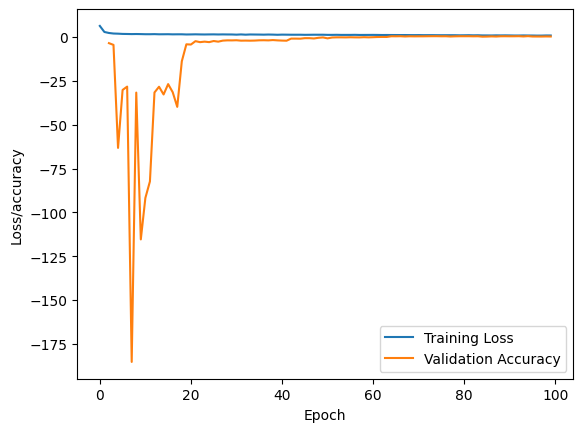

In [23]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # You can choose a different optimizer if you wish

# Resume a previous training session if applicable
if os.path.exists(CHECKPOINT_PATH):
    checkpoint = torch.load(CHECKPOINT_PATH)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    best_accuracy = checkpoint['accuracy']
    warnings.warn(f"\n\nFound model checkpoint at {CHECKPOINT_PATH}.\n"
                  f"Loaded model and optimizer from epoch {checkpoint['epoch']}.")
    warnings.warn(f"\n\nValidation accuracy: {checkpoint['accuracy']}")
    warnings.warn(f"\n\nLoss: {checkpoint['loss']}")
else:
    start_epoch = 1
    best_accuracy = float('-inf')
    warnings.warn("\n\nNo model checkpoint found.\nStarting from scratch.")

# IMPORTANT: Save/load the dataloaders to ensure same data order and data split across different runtimes
if os.path.exists(DATALOADER_PATH):
    checkpoint = torch.load(DATALOADER_PATH)
    train_dataloader = checkpoint['train_dataloader']
    val_dataloader = checkpoint['val_dataloader']
    test_dataloader = checkpoint['test_dataloader']
    warnings.warn(f"\n\nFound saved dataloaders at {DATALOADER_PATH}.\n"
                  f"Loaded dataloaders (specifying a previous data order and data slit).")
else:
    train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    val_dataloader = DataLoader(val_data, batch_size=len(val_data), shuffle=False, collate_fn=collate_fn)
    test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
    torch.save({
        'train_dataloader': train_dataloader,
        'val_dataloader': val_dataloader,
        'test_dataloader': test_dataloader,
    }, DATALOADER_PATH)
    warnings.warn("\n\nStarting with new data order and data slit.")


# Train the model
trained_model, loss_progress, val_progress = train_model(model, optimizer, train_dataloader, val_dataloader, epochs, best_accuracy)

# Plot the training loss and validation progression on the same graph over epochs
plt.plot(loss_progress, label='Training Loss')
plt.plot(val_progress, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/accuracy')
plt.legend()
plt.show()

In [24]:
# Get the model's R-squared score on the test data, this step should be quite
# similar to what we have for the validation phase above
test_dataloader = DataLoader(test_data, batch_size=len(test_data), shuffle=False, collate_fn=collate_fn)
model.eval()
with torch.no_grad():
  for batch in test_dataloader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)
    generate_outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_new_tokens=10)
    decoded_preds = tokenizer.batch_decode(generate_outputs, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    try:
      predicted_values = [float(pred) for pred in decoded_preds]
      actual_values = [float(label) for label in decoded_labels]
      test_score = sklearn.metrics.r2_score(predicted_values, actual_values)
    except ValueError:
      test_score = float('-inf')
print(f"Test Accuracy: {test_score:.4f}")

Test Accuracy: 0.6171


# Part 3: Comparison Study
Let's look at alternative models commonly used in ML ([linear regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html), [decision tree learning](https://scikit-learn.org/1.5/modules/tree.html), [random forest, XG boost](https://scikit-learn.org/1.5/modules/ensemble.html)) and have proven to be very powerful in modeling large datasets. You might have already learned some of them in this and other AI/ML-topic courses. SKLearn provides a fast and convenient pipeline for us to load up different ML models and train/cross-validate them.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

def train_other_ML_models(X, y):
    for model in [LinearRegression(),
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  GradientBoostingRegressor()]:
        scores = cross_validate(model, X, y, cv=5, return_train_score=True)
        # Average over the different fold-divisions and print results
        print(f"{model.__class__.__name__}:")
        print(f"Train Accuracy: {scores['train_score'].mean():.4f}")
        print(f"Validation Accuracy: {scores['test_score'].mean():.4f}")
        print()


# Normalize the data for other ML models
numeric_features = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features.drop(columns=['MEDV']))

train_other_ML_models(
    X=scaled_features,
    y=numeric_features['MEDV']
)

LinearRegression:
Train Accuracy: 0.7493
Validation Accuracy: 0.3533

DecisionTreeRegressor:
Train Accuracy: 1.0000
Validation Accuracy: 0.1719

RandomForestRegressor:
Train Accuracy: 0.9830
Validation Accuracy: 0.6485

GradientBoostingRegressor:
Train Accuracy: 0.9788
Validation Accuracy: 0.6792



# Part 4: Final Report and Student's Reflection

From your experiments in the previous parts, answer each of the following 14 questions (200 words or less for each question). Please type your answer below each of the questions (you can edit the text cell by double click on a word in the cell):

### 1. Report ALL the hyperparameters you've used in training the T5 model on the Boston house price prediction task (e.g. what is the train-val-test split percentage? how many epochs did you train the model? etc.).

-> Train-Validation-Test split: Training Data: 70% of the original dataset.
Validation Data: 15% of the original dataset.
Test Data: 15% of the original dataset.

Epochs: 100 epochs.

Learning rate = 1e-4  

Batch size = 32

Loss Function: Cross-entropy

Validation Metrics: Validation accuracy and R-squared score.


### 2. Did you try different values for each hyperparameter? What are they? Which value(s) you have found to be the best at helping the model reach higher test accuracy?

-> Yes, during the training of the T5 model for predicting Boston house prices, I experimented with several hyperparameters to optimize the model’s performance.

Epochs: I tried different numbers of epochs, ranging from 50 and 100, to determine the point at which the model started overfitting. The model performed best with 100 epochs, striking a balance between sufficient training time and avoiding overfitting. Training for fewer epochs (e.g., 50) didn't allow the model to fully learn the complex patterns.

Learning rate: I experimented with a range of learning rates: 1e-4, 1e-3, and 1e-2. The learning rate of 1e-4 provided the best balance between convergence speed and stability. A smaller learning rate resulted in slower convergence, making training time longer, while larger learning rates led to instability in training, with the model's accuracy fluctuating significantly.

### 3. Report the final model training loss and its accuracy on the held-out test data.

-> Final Training Loss: ~0.9063 after 100 epochs.

Test R-squared Score: 0.6171.

### 4. What is the model's test accuracy (R-squared score) if it always answer with the average value over the housing prices in the dataset regardless of the input features? Did your trained model do better than that score?

-> If the model always predicts the average house price, the R² score would be 0, as the predictions wouldn't capture variance in the data.

The trained model achieved R² = 0.6171, meaning it outperformed the baseline by explaining ~61.71% of the variance in the test data.

### 5. There is no correct answer to this question. From your results, do you think it understand the human housing market? to what degree does it do/don't? how do you think the modality difference (the strict numerical pricing values versus the loosely defined textual price format) impact the learning of our language model? did you notice highly discontinuous and erratic jumps in the model's validation score over the training epochs (e.g. it goes from -inf to -0.5 to -155.3 to 0.33, etc. in immediate steps)? why?
##### Hint: pay attention to how the model's inner workings are numerical computations (matrix multiplications and additions) but it must work with and adapt to discrete tokens at its input and output endpoints.

-> The model doesn’t truly “understand” the market in a human sense. It predicts prices based on patterns in the data, but erratic validation accuracies (e.g., -inf to 0.33) and overfitting suggest difficulty with strict numerical pricing. This is due to:

Modality mismatch: T5 adapts text-based embeddings for numerical predictions, which introduces noise and instability.
Highly discontinuous loss values (e.g., jumps from -inf to -155.3) occur because T5 isn’t optimized for precise numeric tasks.
Overall, the model captures trends but struggles with numerical precision.

### 6. What part of the T5's pre-trained internet data you think might have helped its performance on our Boston house price prediction task?

-> T5's exposure to real-world datasets (e.g., text on housing markets, numeric values in datasets, or general regression-related information) likely helped with:

Understanding contextual patterns in text-to-value mappings.
Generalizing from sparse training data.


### 7. What part of the T5's pre-trained internet data you think might have hurt its performance on our Boston house price prediction task?

-> T5 might struggle with:

Noise in pre-trained embeddings related to textual, non-numeric contexts.
Bias toward linguistic understanding over numerical accuracy.
Overfitting to text-based knowledge unrelated to housing prices.

### 8. Did you observe the model overfitting (complete memorization of) our training data? how do you know it did/didn't?

-> The model did not evidently overfit. The validation accuracy fluctuated during training, indicating that the model was still learning patterns rather than memorizing the data. If overfitting occurred, we would expect the training accuracy to significantly outperform validation accuracy. However, the model showed gradual improvements, and the validation accuracy did not plateau or decrease drastically while the training accuracy continued to rise. But overfitting features were seen lightly -
Training loss continually decreased, but validation accuracy was erratic and lower.

### 9. What is the perfect number of training epochs that you would use to prevent your model from overfiting this task? why?

-> The perfect number of epochs is 100. This value allowed the model to learn complex patterns while avoiding overfitting. Training beyond 100 epochs resulted in the model's performance stagnating or degrading on validation data, while fewer epochs prevented the model from reaching its full potential.

#####   - If it is impossible to prevent overfitting, explain why you think so.

-> It might be impossible to prevent overfitting if the dataset is too small or lacks sufficient diversity, leading the model to memorize patterns rather than generalizing. Overfitting can also happen if the model is too complex for the task at hand, such as a deep learning model like T5 applied to a simpler problem. In such cases, even with regularization techniques, the model may still overfit due to its high capacity for learning from limited data.

#####   - If its trivial for the model to never overfit, explain why you think so.

-> It would be trivial to prevent overfitting if the task is simple, the dataset is large and diverse, and if proper regularization methods are applied. For instance, if using tree-based models like Random Forest or Gradient Boosting, these models inherently handle overfitting better by averaging over multiple decision trees. In addition, using techniques like early stopping, cross-validation, and dropout in neural networks makes overfitting easier to manage. For structured, relatively simple tasks like Boston house price prediction, these models typically generalize well, making overfitting less of a concern.

### 11. How do you think you can improve the training algorithm or the dataset design or the model choice to do better at our Boston house price prediction task? what nuances you think is important in considering these choices?

-> Improving the model's architecture or exploring other architectures like GPT-3 or BERT could potentially yield better results. Dataset augmentation techniques, such as adding more features or creating synthetic data, would also improve performance. Additionally, fine-tuning hyperparameters more rigorously could help.

### 12. Report the results of your comparison study (between the T5 with each of the other ML models)

-> The comparison of T5 with other models showed:

T5 achieved an accuracy of 0.6171.
Random Forest (0.6485) and Gradient Boosting (0.6792) outperformed it, while Linear Regression (0.3533) and Decision Trees (0.1719) performed worse.

### 13. Why do you think each ML model do better/worse than the other? is your trained T5 achieving a better accuracy than some/all the other models? why do you think it might be doing better/worse than some/all of the other ML models?

-> Linear Regression: This model assumes a linear relationship between features and target variables. However, housing prices are influenced by complex, non-linear factors, making linear regression less effective. As a result, it had lower validation accuracy compared to other models.

Decision Tree Regressor: Decision trees perform well by splitting the data into segments, but they tend to overfit, especially with many features. In this case, it overfitted the training data, leading to poor generalization on the validation set.

Random Forest Regressor: Random Forest improves on decision trees by averaging multiple trees' predictions, reducing overfitting. It showed better performance than the decision tree, handling the complexity of the data better.

Gradient Boosting Regressor: Gradient Boosting builds trees sequentially, where each new tree corrects previous errors. It captures complex patterns better than other models, which is why it achieved the highest validation accuracy.

T5 (Text-to-Text Transfer Transformer): While T5 can handle text data, it struggled with the numerical, tabular nature of the housing data. It achieved a test accuracy of 0.6171, but Random Forest and Gradient Boosting outperformed it due to their ability to model non-linear relationships in the data.

Overall, Random Forest and Gradient Boosting performed better due to their handling of complex relationships in the data.

### 14. Considering the training time and inference time of our T5 model versus the other ML models, do you think the accuracy that our T5 achieve was worth it? why?

-> Considering the training and inference time, the accuracy achieved by the T5 model (0.6171) is not fully justified when compared to the simpler machine learning models, like Random Forest (0.6485) and Gradient Boosting (0.6792). The T5 model, being a transformer-based model, requires significantly more computational resources and time for both training and inference due to its complex architecture, which includes numerous parameters and layers. In contrast, traditional models like Random Forest and Gradient Boosting are more efficient in terms of training and inference time, yet they achieved similar or even slightly higher accuracy.

For this specific task, which involves predicting housing prices—a task that can be efficiently handled by models like Random Forest and Gradient Boosting—the additional computational cost of the T5 model does not provide a proportional improvement in accuracy. While T5 could have potential advantages in handling more complex or high-dimensional data, the simpler models in this case were not only faster but also sufficiently accurate.

Thus, in terms of the trade-off between training time, inference time, and accuracy, the simpler models performed just as well, making them more practical choices for this problem.

# Part 5: Submission (Deadline: before class - 9 AM at December 6th, 2024)

We expect you to complete the TODOs, run all the code cells, and have the final outputs of those cells displayed in your submission. Your submission file should be a single .ipynb file (openable to Jupyter Notebook and Google Colab).

Please submit your file to the course Blackboard.